# Testing Angular Averaging

## Test if doing a 2D average then a 1D, has the same results as a pure 1D.

In [1]:
import numpy as np
from powerbox.tools import angular_average_nd, angular_average

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [46]:
def angular_average(field,coords,bins, weights = 1, average=True):
    r"""
    Perform a radial histogram -- averaging within radial bins -- of a field.

    Parameters
    ----------
    field : array
        An array of arbitrary dimension specifying the field to be angularly averaged.

    coords : array
        The magnitude of the co-ordinates at each point of `field`. Must be the same size as field.

    bins : float or array.
        The ``bins`` argument provided to histogram. Can be an int or array specifying bin edges.

    weights : array, optional
        An array of the same shape as `field`, giving a weight for each entry.
        
    average : bool, optional
        Whether to take the (weighted) average. If False, returns the (unweighted) sum.
    Returns
    -------
    field_1d : array
        The field averaged angularly (finally 1D)

    binavg : array
        The mean co-ordinate in each radial bin.

    Examples
    --------
    Create a 3D radial function, and average over radial bins:

    >>> import numpy as np
    >>> import matplotlib.pyplot as plt
    >>> x = np.linspace(-5,5,128)   # Setup a grid
    >>> X,Y,Z = np.meshgrid(x,x,x)  # ""
    >>> r = np.sqrt(X**2+Y**2+Z**2) # Get the radial co-ordinate of grid
    >>> field = np.exp(-r**2)       # Generate a radial field
    >>> avgfunc, bins = angular_average(field,r,bins=100)   # Call angular_average
    >>> plt.plot(bins, np.exp(-bins**2), label="Input Function")   # Plot input function versus ang. avg.
    >>> plt.plot(bins, avgfunc, label="Averaged Function")
    """
    if not np.iterable(bins):
        bins = np.linspace(coords.min(), coords.max() *1.001, bins + 1)

    indx, binav, sumweight = _get_binweights(coords, weights, bins, average)

    if len(np.unique(indx)) != len(bins) - 1:
        print "NOT ALL BINS FILLED: ", len(np.unique(indx)), len(bins) - 1, len(sumweight)

    binav = np.bincount(indx, weights=(weights*coords).flatten())/sumweight
    res = _field_average(indx,field, weights, sumweight)

    return res, binav

def _magnitude_grid(x,dim=None):
    if dim is not None:
        return np.sqrt(np.sum(np.meshgrid(*([x ** 2]*dim)), axis=0))
    else:
        return np.sqrt(np.sum(np.meshgrid(*([x**2 for x in x])), axis=0))

def _field_average(indx, field,weights, sumweights):

    field *= weights
    rl = np.bincount(indx, weights=np.real(field.flatten()))/sumweights
    if field.dtype.kind == "c":
        im = 1j*np.bincount(indx, weights=np.imag(field.flatten()))/sumweights
    else:
        im = 0

    return rl + im

def _get_binweights(coords, weights, bins, average=True):
    indx = np.digitize(coords.flatten(), bins) - 1

    if average:
        if not np.isscalar(weights):
            sumweights = np.bincount(indx, weights=weights.flatten())
        else:
            sumweights = np.bincount(indx)

        binweight = sumweights
    else:
        sumweights = 1

        if not np.isscalar(weights):
            binweight = np.bincount(indx, weights=weights.flatten())
        else:
            binweight = np.bincount(indx)

    binav = np.bincount(indx, weights=(weights*coords).flatten())/binweight

    return indx, binav, sumweights

In [2]:
x = np.linspace(-1,1,256)
X,Y,Z = np.meshgrid(x,x,x)
r = np.sqrt(X**2+Y**2+Z**2)

In [3]:
field = r**-2.

In [33]:
bins = np.linspace(r.min(), r.max() * 1.001 , 100 + 1)

In [35]:
indx = np.digitize(r.flatten(), bins)

In [42]:
sw = np.bincount(indx-1)

In [43]:
len(sw)

100

In [37]:
bins.max()

1.7337828583764459

In [38]:
indx.max()

100

In [4]:
func_1d, rbins = angular_average(field, r, bins=100)

In [5]:
func_2d, r2bins, zbins = angular_average_nd(field, [x,x,x], bins=50, n=2)

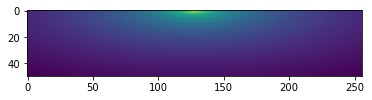

In [6]:
plt.imshow(func_2d,norm=LogNorm())

In [13]:
r2bins

array([ 0.0228734 ,  0.04908291,  0.07622996,  0.10453818,  0.13339201,
        0.16140157,  0.18923134,  0.21727262,  0.24541893,  0.27361282,
        0.30168324,  0.33015591,  0.35804101,  0.38617289,  0.41480029,
        0.4429415 ,  0.47119235,  0.49915969,  0.52734299,  0.55567827,
        0.58359589,  0.6118256 ,  0.63994044,  0.66820193,  0.69664814,
        0.7248047 ,  0.75325076,  0.78139661,  0.80938214,  0.83762104,
        0.86566751,  0.89393467,  0.92210477,  0.95024189,  0.97845842,
        1.0058821 ,  1.03439482,  1.06270299,  1.09100906,  1.11922397,
        1.14746629,  1.1756785 ,  1.2038205 ,  1.23177137,  1.25965769,
        1.28751454,  1.31497796,  1.34362393,  1.37293781,  1.39947583])

In [17]:
rcoords[:,128]

array([  8.96996053e-05,   1.92482012e-04,   2.98941035e-04,
         4.09953635e-04,   5.23105903e-04,   6.32947345e-04,
         7.42083706e-04,   8.52049500e-04,   9.62427161e-04,
         1.07299145e-03,   1.18307154e-03,   1.29472907e-03,
         1.40408240e-03,   1.51440348e-03,   1.62666781e-03,
         1.73702550e-03,   1.84781312e-03,   1.95748897e-03,
         2.06801172e-03,   2.17913045e-03,   2.28861133e-03,
         2.39931610e-03,   2.50957034e-03,   2.62039971e-03,
         2.73195349e-03,   2.84237138e-03,   2.95392455e-03,
         3.06430045e-03,   3.17404760e-03,   3.28478838e-03,
         3.39477455e-03,   3.50562614e-03,   3.61609714e-03,
         3.72643877e-03,   3.83709182e-03,   3.94463567e-03,
         4.05645029e-03,   4.16746269e-03,   4.27846688e-03,
         4.38911361e-03,   4.49986781e-03,   4.61050393e-03,
         4.72086470e-03,   4.83047595e-03,   4.93983409e-03,
         5.04907662e-03,   5.15677633e-03,   5.26911344e-03,
         5.38406984e-03,

In [18]:
r2bins

array([ 0.0228734 ,  0.04908291,  0.07622996,  0.10453818,  0.13339201,
        0.16140157,  0.18923134,  0.21727262,  0.24541893,  0.27361282,
        0.30168324,  0.33015591,  0.35804101,  0.38617289,  0.41480029,
        0.4429415 ,  0.47119235,  0.49915969,  0.52734299,  0.55567827,
        0.58359589,  0.6118256 ,  0.63994044,  0.66820193,  0.69664814,
        0.7248047 ,  0.75325076,  0.78139661,  0.80938214,  0.83762104,
        0.86566751,  0.89393467,  0.92210477,  0.95024189,  0.97845842,
        1.0058821 ,  1.03439482,  1.06270299,  1.09100906,  1.11922397,
        1.14746629,  1.1756785 ,  1.2038205 ,  1.23177137,  1.25965769,
        1.28751454,  1.31497796,  1.34362393,  1.37293781,  1.39947583])

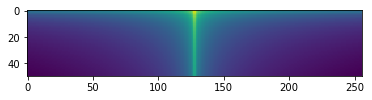

In [15]:
plt.imshow(rcoords**-2.,norm=LogNorm())

In [19]:
rcoords = np.sqrt(np.add.outer(r2bins**2, zbins[0]**2))
func_2d_1d, rbins_ = angular_average(func_2d,rcoords, bins=50)

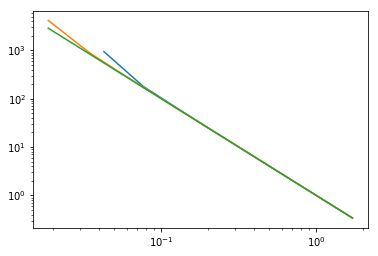

In [20]:
plt.plot(rbins_, func_2d_1d)
plt.plot(rbins, func_1d)
plt.plot(rbins, rbins**-2.)
plt.xscale('log')
plt.yscale('log')